<a href="https://colab.research.google.com/github/Christianah001/Hackbio-biocoding-internship/blob/main/Stage2_Task2_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install seaborn
!pip install pandas
!pip install matplotlib
!pip install numpy
!pip install adjustText

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from adjustText import adjust_text

In [ ]:
#Load the data

transcriptomics = "https://gist.githubusercontent.com/stephenturner/806e31fce55a8b7175af/raw/1a507c4c3f9f1baaa3a69187223ff3d3050628d4/results.txt" #add data source
df = pd.read_csv(transcriptomics, sep=" ").dropna()

In [ ]:
print(df.head(10))

      Gene  log2FoldChange        pvalue      padj
0     DOK6          0.5100  1.861000e-08  0.000305
1     TBX5         -2.1290  5.655000e-08  0.000419
2  SLC32A1          0.9003  7.664000e-08  0.000419
3   IFITM1         -1.6870  3.735000e-06  0.006809
4    NUP93          0.3659  3.373000e-06  0.006809
5  EMILIN2          1.5340  2.976000e-06  0.006809
6     TPX2         -0.9974  2.097000e-06  0.006809
7    LAMA2         -1.4250  2.390000e-06  0.006809
8     CAV2         -1.0520  3.213000e-06  0.006809
9      TNN         -1.6580  8.973000e-06  0.014720


In [ ]:
#Prepare data for volcano plot

df['nlog10'] = -np.log10(df.padj)

In [ ]:
print(df.head(10))

      Gene  log2FoldChange        pvalue      padj    nlog10
0     DOK6          0.5100  1.861000e-08  0.000305  3.515273
1     TBX5         -2.1290  5.655000e-08  0.000419  3.377682
2  SLC32A1          0.9003  7.664000e-08  0.000419  3.377682
3   IFITM1         -1.6870  3.735000e-06  0.006809  2.166917
4    NUP93          0.3659  3.373000e-06  0.006809  2.166917
5  EMILIN2          1.5340  2.976000e-06  0.006809  2.166917
6     TPX2         -0.9974  2.097000e-06  0.006809  2.166917
7    LAMA2         -1.4250  2.390000e-06  0.006809  2.166917
8     CAV2         -1.0520  3.213000e-06  0.006809  2.166917
9      TNN         -1.6580  8.973000e-06  0.014720  1.832092


<Axes: xlabel='log2FoldChange', ylabel='nlog10'>

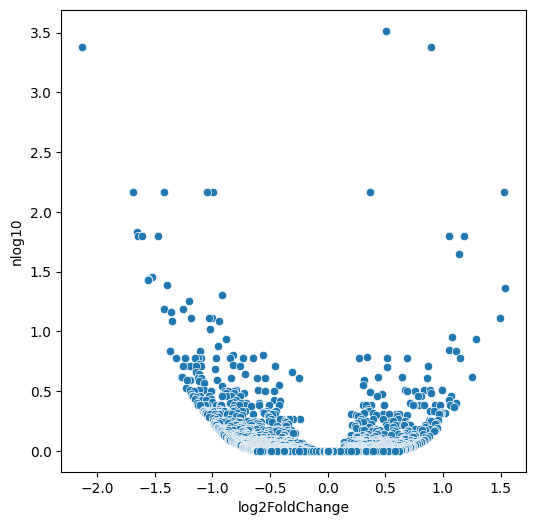

In [ ]:
#Generate the volcano plot
plt.figure(figsize = (6,6))

sns.scatterplot(data = df, x = 'log2FoldChange', y = 'nlog10')

<ipython-input-17-40a0781b3cde>:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Significance')


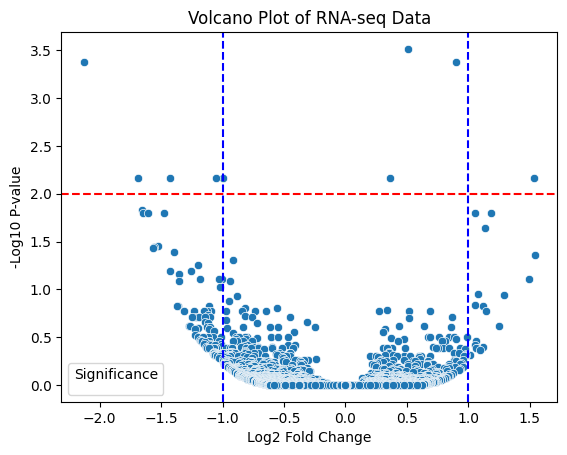

In [ ]:
# Plot settings

sns.scatterplot(data=df, x='log2FoldChange', y='nlog10')
plt.title("Volcano Plot of RNA-seq Data")
plt.xlabel("Log2 Fold Change")
plt.ylabel("-Log10 P-value")
plt.axhline(-np.log10(0.01), color='red', linestyle='--')
plt.axvline(1, color='blue', linestyle='--')
plt.axvline(-1, color='blue', linestyle='--')
plt.legend(title='Significance')
plt.show()

Upregulated Genes:
         Gene  log2FoldChange    pvalue
5     EMILIN2           1.534  0.000003
10     POU3F4           1.181  0.000011
14  LOC285954           1.050  0.000015
15      VEPH1           1.137  0.000022
20      DTHD1           1.540  0.000056

Downregulated Genes:
     Gene  log2FoldChange        pvalue
1    TBX5          -2.129  5.655000e-08
3  IFITM1          -1.687  3.735000e-06
7   LAMA2          -1.425  2.390000e-06
8    CAV2          -1.052  3.213000e-06
9     TNN          -1.658  8.973000e-06


<Axes: xlabel='log2FoldChange', ylabel='nlog10'>

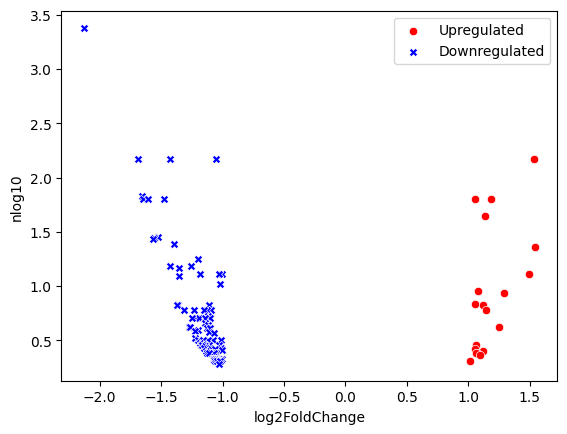

In [ ]:
# Highlight upregulated and downregulated genes

upregulated_genes = df[(df['log2FoldChange'] > 1) & (df['pvalue'] < 0.01)]
downregulated_genes = df[(df['log2FoldChange'] < -1) & (df['pvalue'] < 0.01)]

print("Upregulated Genes:")
print(upregulated_genes[['Gene', 'log2FoldChange', 'pvalue']].head(5))

print("\nDownregulated Genes:")
print(downregulated_genes[['Gene', 'log2FoldChange', 'pvalue']].head(5))

sns.scatterplot(data=upregulated_genes, x='log2FoldChange', y='nlog10', color='red', label='Upregulated', marker='o')
sns.scatterplot(data=downregulated_genes, x='log2FoldChange', y='nlog10', color='blue', label='Downregulated', marker='X')

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


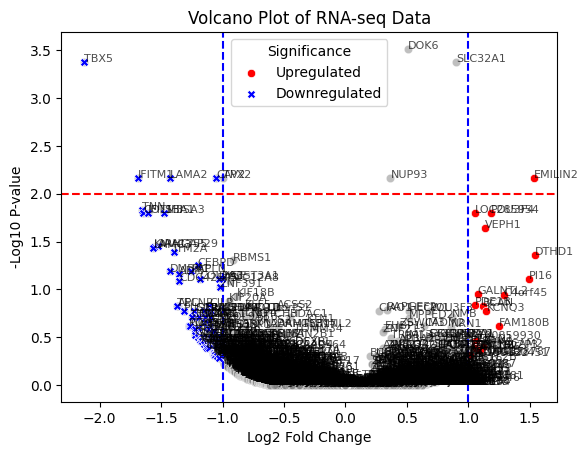

In [ ]:
#Prepare data for volcano plot

df['nlog10'] = -np.log10(df.padj)
sns.scatterplot(data=df, x='log2FoldChange', y='nlog10', color='gray', alpha=0.5)


upregulated_genes = df[(df['log2FoldChange'] > 1) & (df['pvalue'] < 0.01)]
downregulated_genes = df[(df['log2FoldChange'] < -1) & (df['pvalue'] < 0.01)]


sns.scatterplot(data=upregulated_genes, x='log2FoldChange', y='nlog10', color='red', label='Upregulated', marker='o')
sns.scatterplot(data=downregulated_genes, x='log2FoldChange', y='nlog10', color='blue', label='Downregulated', marker='X')

for i in range(df.shape[0]):
    plt.annotate(df['Gene'][i],
                 (df['log2FoldChange'][i], df['nlog10'][i]),
                 fontsize=8, alpha=0.7)

#Annotate all genes
texts = []
for i in range(len(df)):
    if df.iloc[i].nlog10 < 0.01 and abs(df.iloc[i].log2FoldChange) > 1:
        texts.append(plt.text(x = df.iloc[i].log2FoldChange, y = df.iloc[i].nlog10, s = df.iloc[i].symbol,
                             fontsize = 12, weight = 'bold'))

# Plot settings
plt.title("Volcano Plot of RNA-seq Data")
plt.xlabel("Log2 Fold Change")
plt.ylabel("-Log10 P-value")
plt.axhline(-np.log10(0.01), color='red', linestyle='--')
plt.axvline(1, color='blue', linestyle='--')
plt.axvline(-1, color='blue', linestyle='--')
plt.legend(title='Significance')
plt.show()

In [ ]:
#functions of the top 5 upregulated genes and top 5 downregulated genes.

#UPREGULATED GENES
1. EMILIN2: May be responsible for anchoring smooth muscle cells to elastic fibers, and may be involved not only in the formation of the elastic fiber,
    but also in the processes that regulate vessel assembly. Has cell adhesive capacity.
2. POU3F4: Probable transcription factor which exert its primary action widely during early neural development and in a very limited set of neurons
   in the mature brain.
3. LOC285954: The funtion is not in the genecards.
4. VEPH1: nteracts with TGF-beta receptor type-1 (TGFBR1) and inhibits dissociation of activated SMAD2 from TGFBR1, impeding its nuclear accumulation
    and resulting in impaired TGF-beta signaling. May also affect FOXO, Hippo and Wnt signaling.
5. DTHD1: The funtion is not in the genecards.

#DOWNREGULATED GENES
1. TBX5: DNA-binding protein that regulates the transcription of several genes and is involved in heart development and limb pattern formation. Binds
    to the core DNA motif of NPPA promoter.
2. IFITM1: IFN-induced antiviral protein which inhibits the entry of viruses to the host cell cytoplasm, permitting endocytosis, but preventing
    subsequent viral fusion and release of viral contents into the cytosol. Active against multiple viruses, including influenza A virus, SARS
    coronaviruses (SARS-CoV and SARS-CoV-2), Marburg virus (MARV), Ebola virus (EBOV), Dengue virus (DNV), West Nile virus (WNV), human
    immunodeficiency virus type 1 (HIV-1) and hepatitis C virus (HCV).
    Can inhibit: influenza virus hemagglutinin protein-mediated viral entry, MARV and EBOV GP1,2-mediated viral entry and SARS-CoV and
    SARS-CoV-2 S protein-mediated viral entry. Also implicated in cell adhesion and control of cell growth and migration
3. LAMA2: Binding to cells via a high affinity receptor, laminin is thought to mediate the attachment, migration and organization of
    cells into tissues during embryonic development by interacting with other extracellular matrix components.
4. CAV2: May act as a scaffolding protein within caveolar membranes. Interacts directly with G-protein alpha subunits and can functionally regulate
    their activity. Acts as an accessory protein in conjunction with CAV1 in targeting to lipid rafts and driving caveolae formation. The Ser-36
    phosphorylated form has a role in modulating mitosis in endothelial cells. Positive regulator of cellular mitogenesis of the MAPK signaling
    pathway. Required for the insulin-stimulated nuclear translocation and activation of MAPK1 and STAT3, and the subsequent regulation of cell cycle
    progression.
5.  TNN: Extracellular matrix protein that seems to be a ligand for ITGA8:ITGB1, ITGAV:ITGB1 and ITGA4:ITGB1. Involved in neurite outgrowth and cell
    migration in hippocampal explants.During endochondral bone formation, inhibits proliferation and differentiation of proteoblasts mediated by
    canonical WNT signaling. In tumors, stimulates angiogenesis by elongation, migration and sprouting of endothelial cells. Expressed in most mammary
    tumors, may facilitate tumorigenesis by supporting the migratory behavior of breast cancer cells.